In [ ]:
                                        ##### ASSIGNMENT 4 #####

In [ ]:
# Question 1 - Fully Connected Autoencoder

In [40]:
from keras import Sequential
from keras.layers import Input, Dense
from keras.models import Model
import keras
import numpy as np
import matplotlib.pyplot as plt

batch_size = 128

(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

# Scales the training and test data to range between 0 and 1.
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

input_length = x_train.shape[1] * x_train.shape[2]
x_train = x_train.reshape((len(x_train), input_length))
x_test = x_test.reshape((len(x_test), input_length))


In [43]:
##Create model
model = Sequential()


# Encoder Layers
def encoder(model):
    model.add(Dense(128, input_shape=(784,), activation='relu'))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(8, activation='relu'))
    model.add(Dense(2, activation='relu'))
    return model


# Decoder Layers
def decoder(encoder):
    model.add(Dense(8, activation='relu'))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(128, activation='relu'))
    model.add(Dense(784, activation='sigmoid'))
    return model


encoder_model = encoder(model)
decoder_model = decoder(encoder_model)
model = decoder_model

decoder_model.summary()
encoder_model.summary()
model.summary()

model.compile(optimizer='rmsprop', loss='mean_squared_error')

history = model.fit(x_train, x_train, epochs=30, batch_size=128, shuffle=True, validation_data=(x_test, x_test))

#Retrieve the decoder layer from the trained model
decoder_layer1 = model.layers[-5]
decoder_layer2 = model.layers[-4]
decoder_layer3 = model.layers[-3]
decoder_layer4 = model.layers[-2]
decoder_layer5 = model.layers[-1]

# Save the decoder model
encoded_input = Input(shape=(2,))
decoder_layers = decoder_layer5(decoder_layer4(decoder_layer3(decoder_layer2(decoder_layer1(encoded_input)))))
decoder = Model(input=encoded_input, output=decoder_layers)
decoder.summary()
decoder.save('Q1_dec_model.h5')


Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_87 (Dense)             (None, 128)               100480    
_________________________________________________________________
dense_88 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_89 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_90 (Dense)             (None, 8)                 264       
_________________________________________________________________
dense_91 (Dense)             (None, 2)                 18        
_________________________________________________________________
dense_92 (Dense)             (None, 8)                 24        
_________________________________________________________________
dense_93 (Dense)             (None, 32)              

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:47: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("de...)`


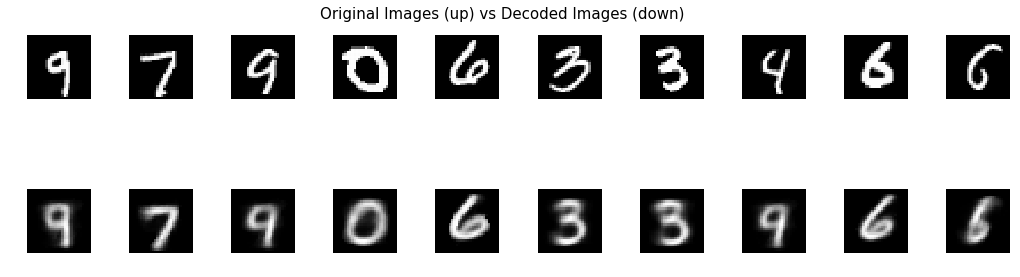

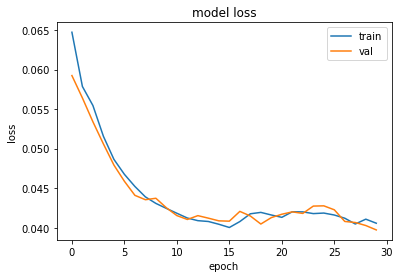

In [44]:
view_decode_img = model.predict(x_test)

fig = plt.figure(figsize=(18, 4))
fig.suptitle('Original Images (up) vs Decoded Images (down)', fontsize=15)
num_random_imgs = 10
random_test_images = np.random.randint(x_test.shape[0], size=num_random_imgs)

for i, image_idx in enumerate(random_test_images):
    # plot original image
    ax1, ax2 = plt.subplot(3, num_random_imgs, i + 1), plt.subplot(3, num_random_imgs, 2 * num_random_imgs + i + 1)
    ax1.imshow(x_test[image_idx].reshape(28, 28), cmap='gray')
    ax2.imshow(view_decode_img[image_idx].reshape(28, 28), cmap='gray')
    ax1.axis('off')
    ax2.axis('off')
    plt.savefig("Q1_images.png", bbox_inches='tight')

plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'])
plt.show()

In [ ]:
# Question 2 - Convolutional Autoencoder

In [ ]:
# Using a minimal bottleneck with 2 neurons

In [45]:
from keras import losses, regularizers, optimizers, Sequential
from keras.models import Model
from keras.layers import Convolution2D, Conv2DTranspose, Input, Dense, MaxPooling2D, UpSampling2D, Conv2D, \
    ZeroPadding2D, Cropping2D, Reshape, Flatten
import matplotlib.pyplot as plt
import numpy as np
import keras

(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

# Scales the training and test data to range between 0 and 1.
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0


input_length = x_train.shape[1] * x_train.shape[2]
x_train = x_train.reshape((len(x_train), 28, 28, 1))
x_test = x_test.reshape((len(x_test), 28, 28, 1))

In [46]:
model = Sequential()

# Encoder Layers
model.add(Conv2D(16, (3, 3), input_shape=x_train.shape[1:], activation='relu', padding='same'))
model.add(MaxPooling2D((2, 2), padding='same'))
model.add(Conv2D(16, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D((2, 2), padding='same'))
model.add(Conv2D(8, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D((2, 2), padding='same'))
model.add(Conv2D(8, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D((2, 2), padding='same'))
model.add(Conv2D(2, (3, 3), strides=(2,2), activation='relu', padding='same'))
model.add(MaxPooling2D((2, 2), padding='same'))

model.summary()

# Decoder Layers
model.add(Conv2D(2, (3, 3), activation='relu', padding='same'))
model.add(UpSampling2D((2, 2)))
model.add(Conv2D(8, (3, 3), activation='relu', padding='same'))
model.add(UpSampling2D((2, 2)))
model.add(Conv2D(8, (3, 3), activation='relu', padding='same'))
model.add(UpSampling2D((2, 2)))
model.add(Conv2D(16, (3, 3), activation='relu', padding='same'))
model.add(UpSampling2D((2, 2)))
model.add(Conv2D(16, (3, 3), activation='relu'))
model.add(UpSampling2D((2, 2)))
model.add(Conv2D(1, (3, 3), activation='sigmoid', padding='same'))

model.summary()


model.compile(optimizer='rmsprop', loss='mean_squared_error')
history = model.fit(x_train, x_train, epochs=30, batch_size=128, validation_data=(x_test, x_test))


Model: "sequential_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_23 (Conv2D)           (None, 28, 28, 16)        160       
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_24 (Conv2D)           (None, 14, 14, 16)        2320      
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 7, 7, 16)          0         
_________________________________________________________________
conv2d_25 (Conv2D)           (None, 7, 7, 8)           1160      
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 4, 4, 8)           0         
_________________________________________________________________
conv2d_26 (Conv2D)           (None, 4, 4, 8)         

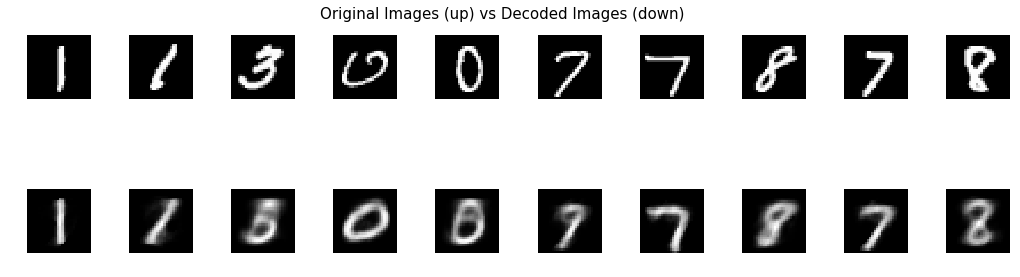

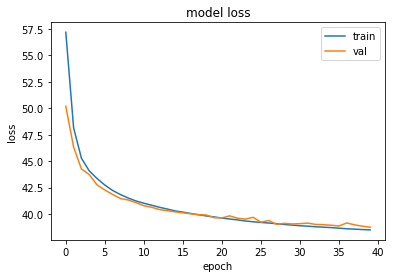

In [186]:
view_decode_img = model.predict(x_test)

fig = plt.figure(figsize=(18, 4))
fig.suptitle('Original Images (up) vs Decoded Images (down)', fontsize=15)
num_random_imgs = 10
random_test_images = np.random.randint(x_test.shape[0], size=num_random_imgs)

for i, image_idx in enumerate(random_test_images):
    # plot original image
    ax1, ax2 = plt.subplot(3, num_random_imgs, i + 1), plt.subplot(3, num_random_imgs, 2 * num_random_imgs + i + 1)
    ax1.imshow(x_test[image_idx].reshape(28, 28), cmap='gray')
    ax2.imshow(view_decode_img[image_idx].reshape(28, 28), cmap='gray')
    ax1.axis('off')
    ax2.axis('off')
    plt.savefig("Q2.1_images.png", bbox_inches='tight')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'])
plt.show()

In [ ]:
# Question 2.2 - Convolutional Autoencoder 

In [ ]:
# Using a larger bottleneck with 6 neurons

In [48]:
from keras import losses, regularizers, optimizers, Sequential
from keras.models import Model
from keras.layers import Convolution2D, Conv2DTranspose, Input, Dense, MaxPooling2D, UpSampling2D, Conv2D, \
    ZeroPadding2D, Cropping2D, Reshape, Flatten
import matplotlib.pyplot as plt
import numpy as np
import keras

(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

# Scales the training and test data to range between 0 and 1.
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0


input_length = x_train.shape[1] * x_train.shape[2]
x_train = x_train.reshape((len(x_train), 28, 28, 1))
x_test = x_test.reshape((len(x_test), 28, 28, 1))


In [49]:

model = Sequential()

# Encoder Layers
model.add(Conv2D(16, (3, 3), input_shape=x_train.shape[1:], activation='relu', padding='same'))
model.add(MaxPooling2D((2, 2), padding='same'))
model.add(Conv2D(16, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D((2, 2), padding='same'))
model.add(Conv2D(8, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D((2, 2), padding='same'))
model.add(Conv2D(8, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D((2, 2), padding='same'))
model.add(Conv2D(6, (3, 3), strides=(2,2), activation='relu', padding='same'))
model.add(MaxPooling2D((2, 2), padding='same'))

model.summary()

# Decoder Layers
model.add(Conv2D(6, (3, 3), activation='relu', padding='same'))
model.add(UpSampling2D((2, 2)))
model.add(Conv2D(8, (3, 3), activation='relu', padding='same'))
model.add(UpSampling2D((2, 2)))
model.add(Conv2D(8, (3, 3), activation='relu', padding='same'))
model.add(UpSampling2D((2, 2)))
model.add(Conv2D(16, (3, 3), activation='relu', padding='same'))
model.add(UpSampling2D((2, 2)))
model.add(Conv2D(16, (3, 3), activation='relu'))
model.add(UpSampling2D((2, 2)))
model.add(Conv2D(1, (3, 3), activation='sigmoid', padding='same'))

model.summary()

model.compile(optimizer='rmsprop', loss='mean_squared_error')
history = model.fit(x_train, x_train, epochs=30, batch_size=128, validation_data=(x_test, x_test))

Model: "sequential_16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_34 (Conv2D)           (None, 28, 28, 16)        160       
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_35 (Conv2D)           (None, 14, 14, 16)        2320      
_________________________________________________________________
max_pooling2d_17 (MaxPooling (None, 7, 7, 16)          0         
_________________________________________________________________
conv2d_36 (Conv2D)           (None, 7, 7, 8)           1160      
_________________________________________________________________
max_pooling2d_18 (MaxPooling (None, 4, 4, 8)           0         
_________________________________________________________________
conv2d_37 (Conv2D)           (None, 4, 4, 8)         

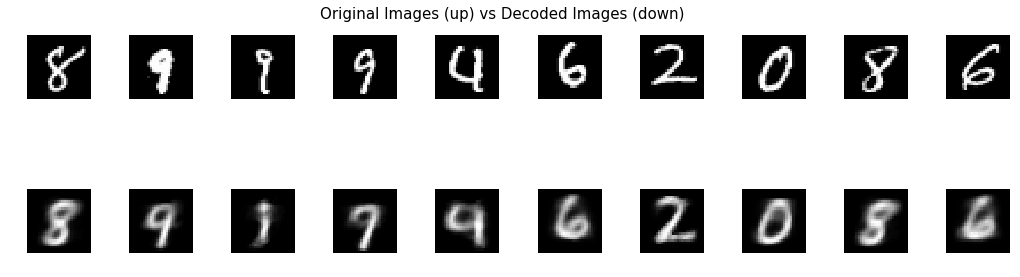

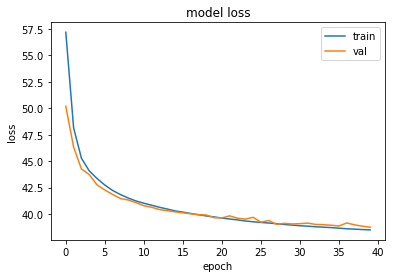

In [165]:
view_decode_img = model.predict(x_test)

fig = plt.figure(figsize=(18, 4))
fig.suptitle('Original Images (up) vs Decoded Images (down)', fontsize=15)
num_random_imgs = 10
random_test_images = np.random.randint(x_test.shape[0], size=num_random_imgs)

for i, image_idx in enumerate(random_test_images):
    # plot original image
    ax1, ax2 = plt.subplot(3, num_random_imgs, i + 1), plt.subplot(3, num_random_imgs, 2 * num_random_imgs + i + 1)
    ax1.imshow(x_test[image_idx].reshape(28, 28), cmap='gray')
    ax2.imshow(view_decode_img[image_idx].reshape(28, 28), cmap='gray')
    ax1.axis('off')
    ax2.axis('off')
    plt.savefig("Q2_images.png", bbox_inches='tight')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'])
plt.show()

In [ ]:
# Question 3a - Visualize trained autoencoder from Q1 through generated random numbers

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 2)                 0         
_________________________________________________________________
dense_6 (Dense)              (None, 8)                 24        
_________________________________________________________________
dense_7 (Dense)              (None, 32)                288       
_________________________________________________________________
dense_8 (Dense)              (None, 64)                2112      
_________________________________________________________________
dense_9 (Dense)              (None, 128)               8320      
_________________________________________________________________
dense_10 (Dense)             (None, 784)               101136    
Total params: 111,880
Trainable params: 111,880
Non-trainable params: 0
_____________________________________________________

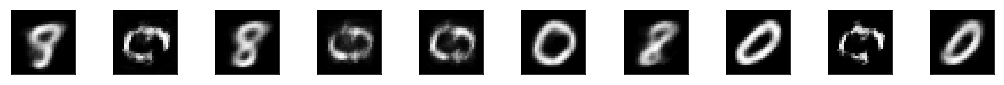

In [201]:
from keras.models import load_model
import matplotlib.pyplot as plt
import numpy as np

decoder = load_model('Q1_dec_model.h5')
decoder.summary()


plt.figure(figsize=(18, 4))
num_images = 10
random_test_images = np.asarray([np.random.normal(0, 4.0, 10), np.random.normal(0, 4.0, 10)])
random_test_images = random_test_images.reshape((10, 2))
view_decode_imgs = decoder.predict(random_test_images)


for i in range(len(random_test_images)):
    ax = plt.subplot(3, num_images, 2 * num_images + i + 1)
    plt.imshow(view_decode_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [148]:
# Question 3b - Autoencoder with standard multi-variate normal distribution 

In [113]:
from keras import Sequential
from keras.layers import Input, Dense, BatchNormalization
from keras.models import Model
import keras
import numpy as np
import matplotlib.pyplot as plt

batch_size = 128
epochs = 50

(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

# Scales the training and test data to range between 0 and 1.
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0


input_length = x_train.shape[1] * x_train.shape[2]
x_train = x_train.reshape((len(x_train), input_length))
x_test = x_test.reshape((len(x_test), input_length))

In [53]:
##Create model
model = Sequential()


# Encoder Layers
def encoder(model):
    model.add(Dense(128, input_shape=(784,), activation='relu'))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(8, activation='relu'))
    model.add(Dense(2, activation='relu'))
    model.add(BatchNormalization(beta_initializer='zeros', gamma_initializer='ones', moving_mean_initializer='zeros',
                                 moving_variance_initializer='ones'))
    return model


# Decoder Layers
def decoder(encoder):
    model.add(Dense(8, activation='relu'))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(128, activation='relu'))
    model.add(Dense(784, activation='sigmoid'))
    return model


encoder_model = encoder(model)
decoder_model = decoder(encoder_model)
model = decoder_model

decoder_model.summary()
encoder_model.summary()
model.summary()

model.compile(optimizer='rmsprop', loss='mean_squared_error')

history = model.fit(x_train, x_train, epochs=30, batch_size=128, shuffle=True, validation_data=(x_test, x_test))

#Retrieve the decoder layer from the trained model
decoder_layer1 = model.layers[-5]
decoder_layer2 = model.layers[-4]
decoder_layer3 = model.layers[-3]
decoder_layer4 = model.layers[-2]
decoder_layer5 = model.layers[-1]

# Save the decoder model
encoded_input = Input(shape=(2,))
decoder_layers = decoder_layer5(decoder_layer4(decoder_layer3(decoder_layer2(decoder_layer1(encoded_input)))))
decoder = Model(input=encoded_input, output=decoder_layers)
decoder.summary()
decoder.save('Q3b_dec_model.h5')

view_decode_img = model.predict(x_test)

Model: "sequential_17"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_97 (Dense)             (None, 128)               100480    
_________________________________________________________________
dense_98 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_99 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_100 (Dense)            (None, 8)                 264       
_________________________________________________________________
dense_101 (Dense)            (None, 2)                 18        
_________________________________________________________________
batch_normalization_3 (Batch (None, 2)                 8         
_________________________________________________________________
dense_102 (Dense)            (None, 8)               

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:49: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("de...)`


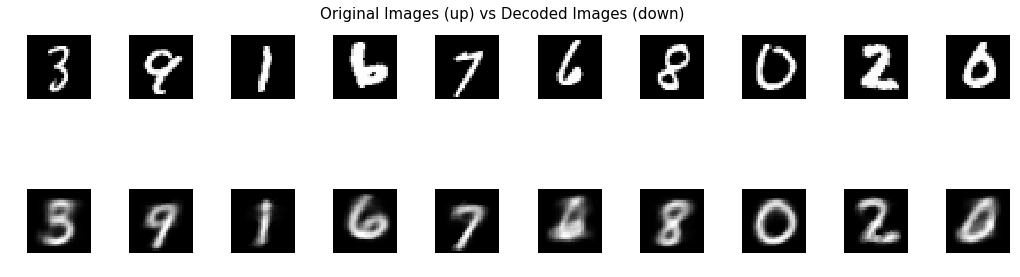

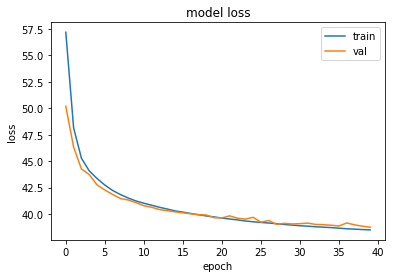

In [174]:
fig = plt.figure(figsize=(18, 4))
fig.suptitle('Original Images (up) vs Decoded Images (down)', fontsize=15)
num_random_imgs = 10
random_test_images = np.random.randint(x_test.shape[0], size=num_random_imgs)

for i, image_idx in enumerate(random_test_images):
    # plot original image
    ax1, ax2 = plt.subplot(3, num_random_imgs, i + 1), plt.subplot(3, num_random_imgs, 2 * num_random_imgs + i + 1)
    ax1.imshow(x_test[image_idx].reshape(28, 28), cmap='gray')
    ax2.imshow(view_decode_img[image_idx].reshape(28, 28), cmap='gray')
    ax1.axis('off')
    ax2.axis('off')
    plt.savefig("Q3b_images.png", bbox_inches='tight')

plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'])
plt.show()

In [ ]:
#Question 3b (2) - Randomly generate inputs to the bottleneck layer that are drawn from the 
#multi-variate standard normal distribution

Model: "model_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_14 (InputLayer)        (None, 2)                 0         
_________________________________________________________________
dense_102 (Dense)            (None, 8)                 24        
_________________________________________________________________
dense_103 (Dense)            (None, 32)                288       
_________________________________________________________________
dense_104 (Dense)            (None, 64)                2112      
_________________________________________________________________
dense_105 (Dense)            (None, 128)               8320      
_________________________________________________________________
dense_106 (Dense)            (None, 784)               101136    
Total params: 111,880
Trainable params: 111,880
Non-trainable params: 0
____________________________________________________

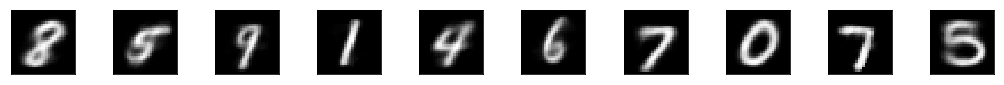

In [176]:
from keras.models import load_model
import matplotlib.pyplot as plt
import numpy as np

decoder = load_model('Q3b_dec_model.h5')
decoder.summary()


plt.figure(figsize=(18, 4))
num_images = 10
random_test_images = np.asarray([np.random.normal(0, 1.0, 10), np.random.normal(0, 1.0, 10)])
random_test_images = random_test_images.reshape((10, 2))
view_decode_imgs = decoder.predict(random_test_images)


for i in range(len(random_test_images)):
    ax = plt.subplot(3, num_images, 2 * num_images + i + 1)
    plt.imshow(view_decode_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [ ]:
#3b (2)-

# As you can see from the above experimentation, the results are better and readable. This is due to addition of
# Batch Normalization at the end of the encoder layer. The Batch Normalization with beta value zero and gamma 
# value 1 is passed for multi variate normal distribution.  

In [177]:
                                            # Question 3c 

# Are the output images different between 1) and 2)? If so, why do you think this difference occurs?

                                            # Answer 

# The main difference is that 3b gives much better readable images than 3a.

# 3b is better because we used the Batch Normalization with multi variate normal distribution. During the training 
# process, the encoder is normalized with the range of 0 to 1. Thus while feeding to the decoder, it is trained
# to converge easily and provide us with much better results. (i.e it is in the range of both encoder and decoder 
# value)

# Whereas for 3a, the encoder output is not in range of 0 to 1. Thus feeding the decoder with a 0 to 1 random number
# distribution gives a slightly less quality and less range of images. The decoder won't predict image which are 
# above the range that we provided. This gives us a restriction of the images that are genererated.

# But this is not case for 3b, while we try to input random numbers in the range of 0 to 1, the decoder identifies 
# much better as we have trained the decoder in the same expected range and and try to predict the right and better 
# readable images

# Also, Batch Normalization is usually used to obtain a steady distribution of activation values during training.
# We used it at the end of the encoder layer, so that the convergence is faster and it becomes less 
# sensitive to changes in the distribution of the inputs, or the hidden layers. Thus gives us a much
# faster and a better result.

In [7]:
# Question 4 - Variational Autoencoder 

In [64]:
from keras import Sequential
from keras.layers import Input, Dense, Lambda
from keras.models import Model
from keras.datasets import mnist
import tensorflow as tf
from keras.losses import mse
from keras import backend as K
import numpy as np
import matplotlib.pyplot as plt

latent_dimension = 2

(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalizing the dataset
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

input_length = x_train.shape[1] * x_train.shape[2]
x_train = x_train.reshape((len(x_train), input_length))
x_test = x_test.reshape((len(x_test), input_length))

input_shape = Input(shape=(input_length,))

In [65]:
##Create model
model = Sequential()


def sampling(args):
    mu_vector, sigma_vector = args
    epsilon = tf.random_normal(K.shape(sigma_vector), dtype=np.float32, mean=0., stddev=1.0)
    sample_latent_vec = mu_vector + K.exp(0.5*sigma_vector) * epsilon
    return sample_latent_vec




def encoder(inputs):
    x_encoded = Dense(256, activation='relu')(inputs)
    #x_encoded = Dense(128, activation='relu')(x_encoded)
    x_encoded = Dense(2, activation='relu')(x_encoded)
    #x_encoded = BatchNormalization(beta_initializer='zeros', gamma_initializer='ones', moving_mean_initializer='zeros',
     #                              moving_variance_initializer='ones')(x_encoded)

    mu_vector = Dense(latent_dimension)(x_encoded)
    sigma_vector = Dense(latent_dimension)(x_encoded)
    encoded = Lambda(sampling, output_shape=(latent_dimension,))([mu_vector, sigma_vector])
    return encoded, mu_vector, sigma_vector


# decoder
def decoder(encoded):
    #z_decoder1 = Dense(128, activation='relu')
    decoded = Dense(256, activation='relu')
    x_decoded = Dense(x_train.shape[1], activation='sigmoid')

    #z_decoded = z_decoder1(z)
    decoded = decoded(encoded)
    decoded = x_decoded(decoded)
    return decoded


# VAE model
encoded, mu_vector, sigma_vector = encoder(input_shape)
outputs = decoder(encoded)
model = Model(input_shape, outputs)


### Finding the VAE Loss
def calc_vae_loss(inputs, outputs):
    reconstruction_loss = mse(inputs, outputs) * x_train.shape[1]
    # KL Divergence
    kl_loss = 1 + sigma_vector - K.square(mu_vector) - K.exp(sigma_vector)
    kl_loss = -0.5 * tf.reduce_sum(kl_loss, axis=-1)
    vae_loss = tf.reduce_mean(reconstruction_loss + kl_loss)
    return vae_loss


vae_loss = calc_vae_loss(input_shape, outputs)
model.add_loss(vae_loss)
model.compile(optimizer='rmsprop')
model.summary()

history = model.fit(x_train, epochs=40, batch_size=128, validation_data=(x_test, None))

/opt/anaconda3/lib/python3.7/site-packages/keras/engine/training_utils.py:819: UserWarning: Output dense_130 missing from loss dictionary. We assume this was done on purpose. The fit and evaluate APIs will not be expecting any data to be passed to dense_130.
  'be expecting any data to be passed to {0}.'.format(name))


Model: "model_17"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_19 (InputLayer)           (None, 784)          0                                            
__________________________________________________________________________________________________
dense_125 (Dense)               (None, 256)          200960      input_19[0][0]                   
__________________________________________________________________________________________________
dense_126 (Dense)               (None, 2)            514         dense_125[0][0]                  
__________________________________________________________________________________________________
dense_127 (Dense)               (None, 2)            6           dense_126[0][0]                  
___________________________________________________________________________________________

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("de...)`
  


Model: "model_19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_21 (InputLayer)        (None, 2)                 0         
_________________________________________________________________
dense_129 (Dense)            (None, 256)               768       
_________________________________________________________________
dense_130 (Dense)            (None, 784)               201488    
Total params: 202,256
Trainable params: 202,256
Non-trainable params: 0
_________________________________________________________________


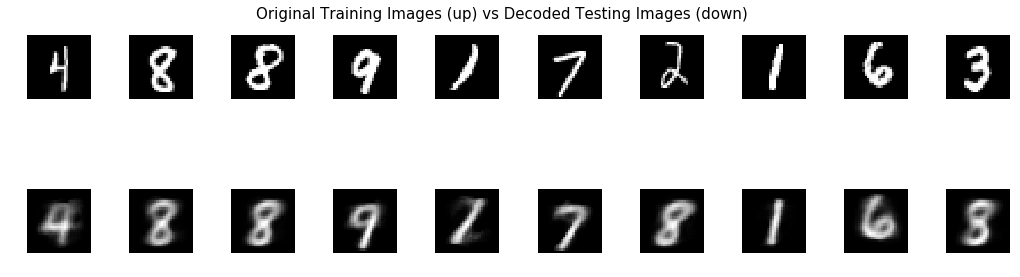

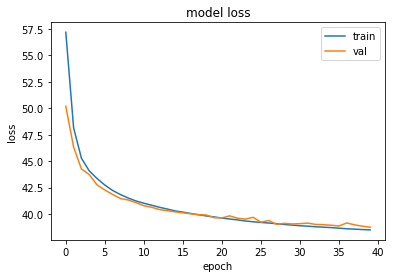

In [71]:
# Retrieve the decoder layer from the trained model
#decoder_layer1 = model.layers[-3]
decoder_layer1 = model.layers[-2]
decoder_layer2 = model.layers[-1]
# Save the decoder model
encoded_input = Input(shape=(2,))
decoder_layers = decoder_layer2(decoder_layer1(encoded_input))
decoder = Model(input=encoded_input, output=decoder_layers)
decoder.summary()
decoder.save('Q4_dec_model.h5')

predict_decode_img = model.predict(x_test)

fig = plt.figure(figsize=(18, 4))
fig.suptitle('Original Training Images (up) vs Decoded Testing Images (down)', fontsize=15)
num_random_imgs = 10
random_test_images = np.random.randint(x_test.shape[0], size=num_random_imgs)

for i, image_idx in enumerate(random_test_images):
    # plot original image
    ax1, ax2 = plt.subplot(3, num_random_imgs, i + 1), plt.subplot(3, num_random_imgs, 2 * num_random_imgs + i + 1)
    ax1.imshow(x_test[image_idx].reshape(28, 28), cmap='gray')
    ax2.imshow(predict_decode_img[image_idx].reshape(28, 28), cmap='gray')
    ax1.axis('off')
    ax2.axis('off')
    plt.savefig("Q4_images.png", bbox_inches='tight')

plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'])
plt.show()

In [ ]:
# Q4 - Visualizing the random generated numbers from the trained vae model

Model: "model_19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_21 (InputLayer)        (None, 2)                 0         
_________________________________________________________________
dense_129 (Dense)            (None, 256)               768       
_________________________________________________________________
dense_130 (Dense)            (None, 784)               201488    
Total params: 202,256
Trainable params: 202,256
Non-trainable params: 0
_________________________________________________________________


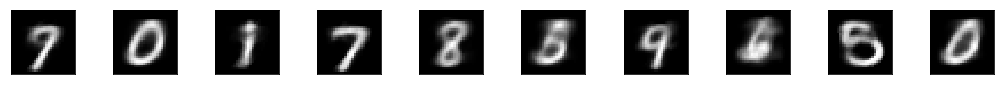

In [183]:
from keras.models import load_model
import matplotlib.pyplot as plt
import numpy as np

decoder = load_model('Q4_dec_model.h5')
decoder.summary()


plt.figure(figsize=(18, 4))
num_images = 10
random_test_images = np.asarray([np.random.normal(0, 1.0, 10), np.random.normal(0, 1.0, 10)])
random_test_images = random_test_images.reshape((10, 2))
view_decode_imgs = decoder.predict(random_test_images)


for i in range(len(random_test_images)):
    ax = plt.subplot(3, num_images, 2 * num_images + i + 1)
    plt.imshow(view_decode_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [ ]:
                                                # Question 4
    
# Does the VAE produce a different quality of output image?

                                                # Answer 

# VAE consists of both an encoder and a decoder and that is trained to minimise the reconstruction error between the 
# encoded-decoded data and the initial data. Instead of encoding an input, the vae encode it as a distribution over 
# the latent space.We are optimizing both the reconstruction loss and the KL loss during the training to reduce 
# the loss and to give much better results. As expected, the results were better and subject to a lot of further 
# experimentations. 

# I attempted few of the experiments myself during this process by trying different optimizers such as rmsprop and 
# adam. Adding regularizers to avoid overfitting etc. During all the above experiments, vae tries find better results
# (with proper optimization & fine tuning) compared to all the above autoencoding methods.
    